In [1]:
%matplotlib inline

In [2]:
import magbot
from magbot import *
import loopfield_mp as lf

In [3]:
a=coils()
a.set_coils(0,1000,10,1e3)
a.set_Bfield()

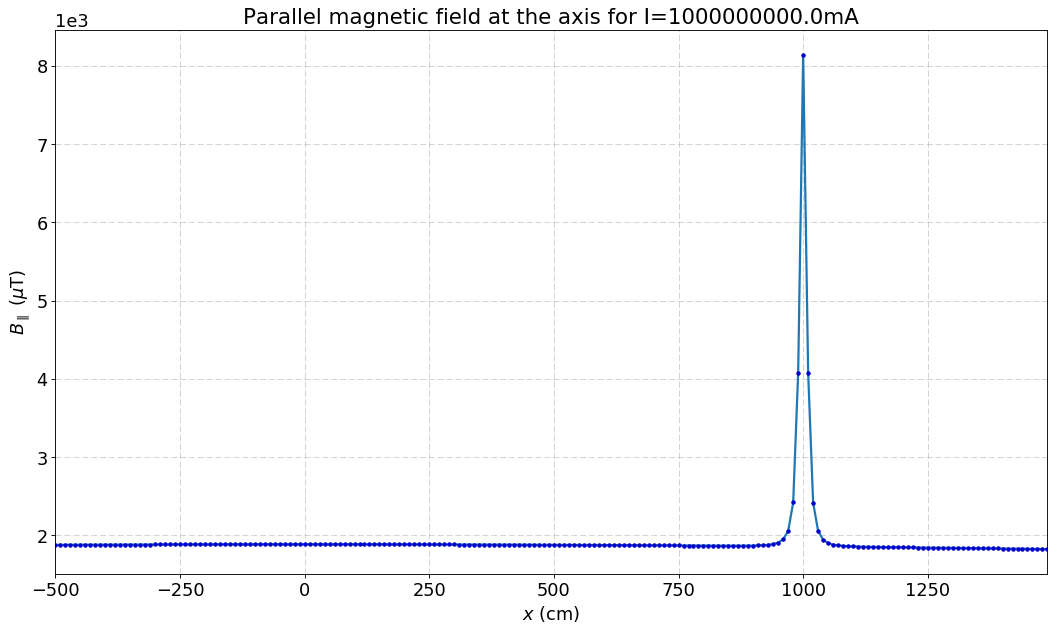

In [4]:
a.v=-1e7
a.r=1e1
a.curr=1e9
a.parmag(0)


In [17]:
q=-1.601e-19
m=9.11e-31
ri=[a.p20/2,a.r,a.r]
vi=[1e7,(4e7),(4e7)]
tf=6e-5
dt=1e-9

a.boris_calc(ri,vi,q,m,tf,dt)
QB=a.borisq

QB=np.transpose(QB)

rB=QB[:3]
vB=QB[3:6]

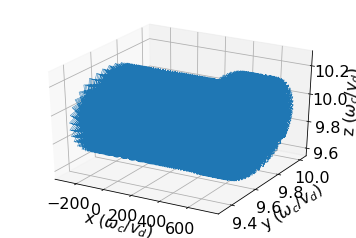

In [19]:
import matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax=fig.gca(projection='3d')
    #ax = fig.add_subplot(111)
    #fig.subplots_adjust(top=0.85)
    #ax.set_title('Some drift')

ax.set_xlabel('x ($\omega_c/v_d$)')
ax.set_ylabel('y ($\omega_c/v_d$)')
ax.set_zlabel('z ($\omega_c/v_d$)')





    #print(r)


ax.plot(rB[0],rB[1],rB[2],lw=0.5)
ax.scatter(rB[0,0],rB[1,0],rB[2,0],c='red')

    #print(r)
    #plt.save('drft.pdf')
plt.show()

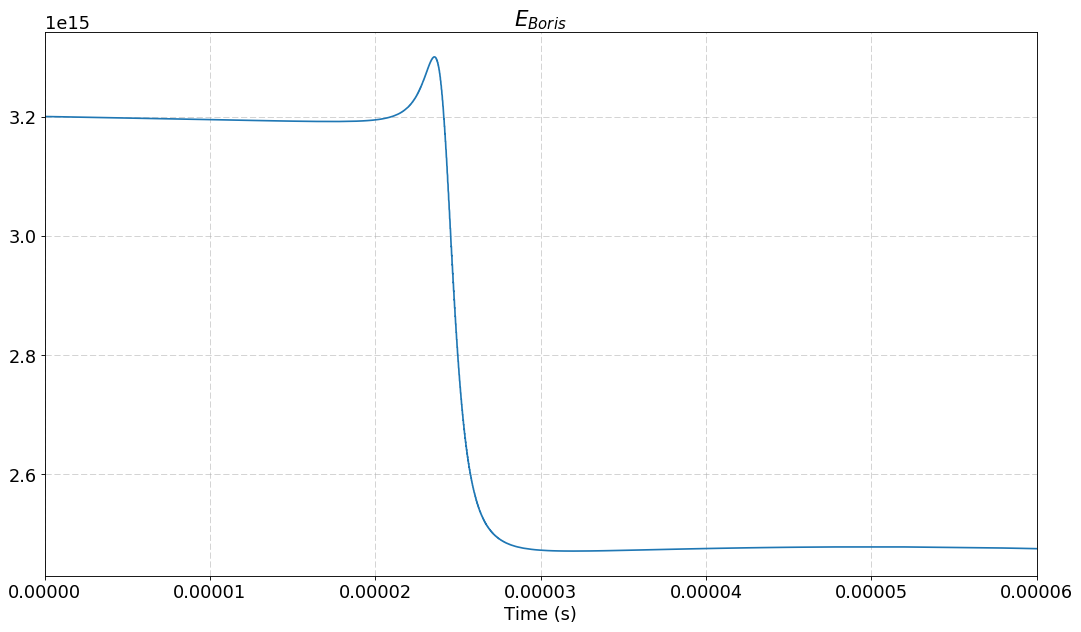

In [23]:
#**2+vB[1][i]**2+vB[2][i]**2
i=0
E2=[]
while i<len(rB[0])-1:
    E2.append(vB[1][i]**2+vB[2][i]**2)
    i=i+1
timearr=np.linspace(0,tf,int(tf/dt))   
fig=plt.figure(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k');
ax2=plt.subplot(1,1,1);
#ax2.set_ylim([min(E2),max(E2)])
ax2.set_xlim([min(timearr),max(timearr)])
ax2.grid(alpha=0.6,linestyle='dashed')
ax2.set_xlabel('Time (s)')


plt.plot(timearr,E2);
ax2.set_title("$E_{Boris}$");

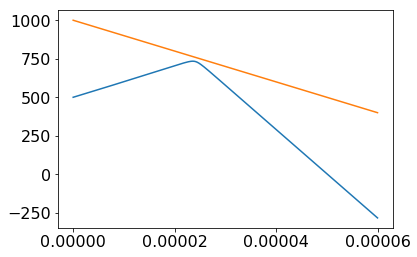

In [21]:
xc2=[a.p20+a.v*ti for ti in timearr]

plt.plot(timearr,rB[0][:-1],timearr,xc2)

In [116]:
vi

[-1325000.0, -1874000.0000000002, -1874000.0000000002]